正在处理数据文件...


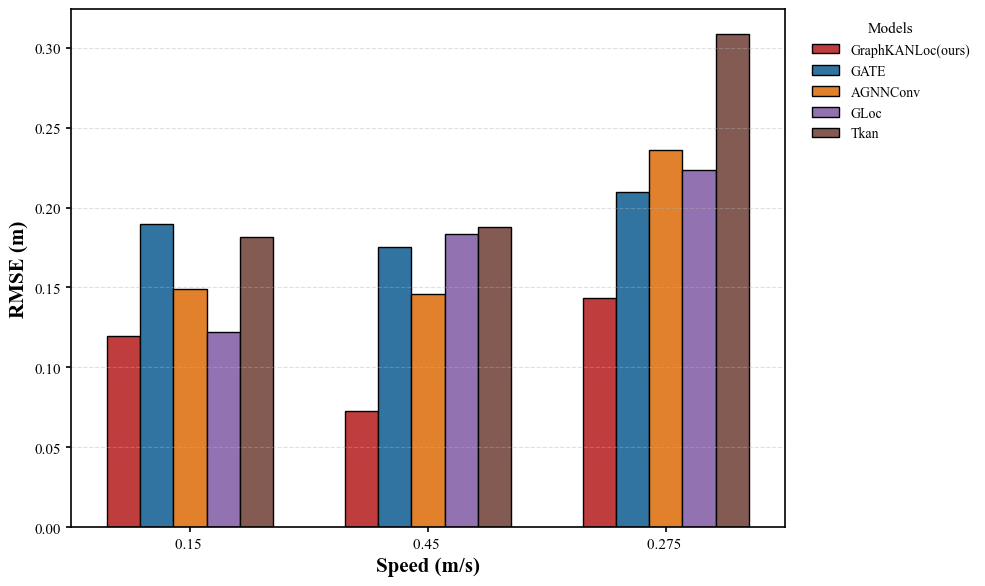


绘图完成！图片已保存为 RMSE_Comparison_Speed.png


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==========================================
# 1. 设置绘图风格 (Nature Style)
# ==========================================
plt.rcParams['font.family'] = 'Times new Roman'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['legend.frameon'] = False

# ==========================================
# 2. 数据文件配置
# ==========================================
# 映射关系: 文件名 -> (模型显示名称, 速度标签)
# 请确保这些 CSV 文件在您的当前目录下
files_config = {
    # GraphKANLoc (Ours)
    "Gkan_0.15_Speed_OB.csv":        ("GraphKANLoc(ours)", "0.15 "),
    "Gkan_0.45_Speed_withoutOB.csv": ("GraphKANLoc(ours)", "0.45 "),
    "Gkan_0.275_Speed_OB.csv": ("GraphKANLoc(ours)", "0.275 "),
    
    # Tkan
    "tkan_0.15_Speed_OB.csv":        ("Tkan", "0.15 "),
    "tkan_OWP.csv": ("Tkan", "0.45 "),
    "tkan_0.275_Speed_OB.csv": ("Tkan", "0.275 "),
    # GATE
    "GATE_0.15_Speed_OB.csv":        ("GATE", "0.15 "),
    "GATE_0.45_Speed_withoutOB.csv": ("GATE", "0.45 "),
    "GATE_0.275_Speed_OB.csv":("GATE", "0.275 "),
    # GLoc
    "GLoc_Final_0.15_Speed_OB.csv":  ("GLoc", "0.15 "),
    "GLoc_0.45_Speed_withoutOB.csv": ("GLoc", "0.45 "),
    "Gloc_0.275_Speed_OB.csv": ("GLoc", "0.275 "),
    # Zigbee (AGNNConv)
    "Zigbee_0.15_Speed_OB.csv": ("AGNNConv", "0.15 "),
    "Zigbee_0.45_Speed_withoutOB.csv":  ("AGNNConv", "0.45 "),
    "Zigbee_0.275_Speed_OB.csv":("AGNNConv", "0.275 ")
}

data_list = []

print("正在处理数据文件...")

for fname, (model_name, speed_label) in files_config.items():
    if os.path.exists(fname):
        try:
            df = pd.read_csv(fname)
            
            # --- 自动检测预测列名 ---
            # 您的部分文件列名可能是 'Pred_Raw_X' 或 'Pred_KF_X'
            pred_x_col = 'Pred_X'
            pred_y_col = 'Pred_Y'
            
            if pred_x_col not in df.columns:
                if 'Pred_Raw_X' in df.columns:
                    pred_x_col = 'Pred_Raw_X'
                    pred_y_col = 'Pred_Raw_Y'
                elif 'Pred_KF_X' in df.columns:
                    pred_x_col = 'Pred_KF_X'
                    pred_y_col = 'Pred_KF_Y'
            
            # --- 计算 RMSE ---
            if pred_x_col in df.columns and 'True_X' in df.columns:
                mse = ((df['True_X'] - df[pred_x_col])**2 + 
                       (df['True_Y'] - df[pred_y_col])**2).mean()
                rmse = np.sqrt(mse)
                
                data_list.append({
                    'Model': model_name,
                    'Speed': speed_label,
                    'RMSE': rmse
                })
            else:
                print(f"Warning: Columns not found in {fname}")
                
        except Exception as e:
            print(f"Error reading {fname}: {e}")
    else:
        print(f"File not found: {fname}")

# 转为 DataFrame
df_results = pd.DataFrame(data_list)

# ==========================================
# 3. 绘制柱状图
# ==========================================
if not df_results.empty:
    plt.figure(figsize=(10, 6))
    
    # 自定义高对比度配色 (红/蓝/橙/紫/棕)
    custom_palette = {
        "GraphKANLoc(ours)": "#D62728", # 红色 (突出显示)
        "GATE":              "#1F77B4", # 蓝色
        "AGNNConv":          "#FF7F0E", # 橙色
        "GLoc":              "#9467BD", # 紫色
        "Tkan":              "#8C564B"  # 棕色
    }
    
    # 指定模型排序 (Ours 排第一)
    model_order = ["GraphKANLoc(ours)", "GATE", "AGNNConv", "GLoc", "Tkan"]
    # 过滤掉数据中没有的模型
    model_order = [m for m in model_order if m in df_results['Model'].unique()]

    # 绘图
    # ci=None: 不显示误差线(因为每个文件只有一个RMSE值)
    sns.barplot(x='Speed', y='RMSE', hue='Model', data=df_results,
                hue_order=model_order,
                palette=custom_palette,
                edgecolor='black', linewidth=1.0,
                width=0.7) # 调整柱子总宽度

    # ==========================================
    # 4. 细节美化
    # ==========================================
    plt.xlabel('Speed (m/s)', fontsize=15, fontweight='bold')
    plt.ylabel('RMSE (m)', fontsize=15, fontweight='bold')
    # plt.title('RMSE Comparison under Different Speeds', fontsize=14, fontweight='bold', pad=20)
    
    # Y轴网格线
    plt.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)
    
    # 图例放在右上角外侧
    plt.legend(title='Models', title_fontsize=11, fontsize=10, 
               bbox_to_anchor=(1.02, 1), loc='upper left')
    
    plt.tight_layout()
    plt.savefig('RMSE_Comparison_Speed.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n绘图完成！图片已保存为 RMSE_Comparison_Speed.png")
else:
    print("没有加载到有效数据，无法绘图。")

正在处理数据文件...


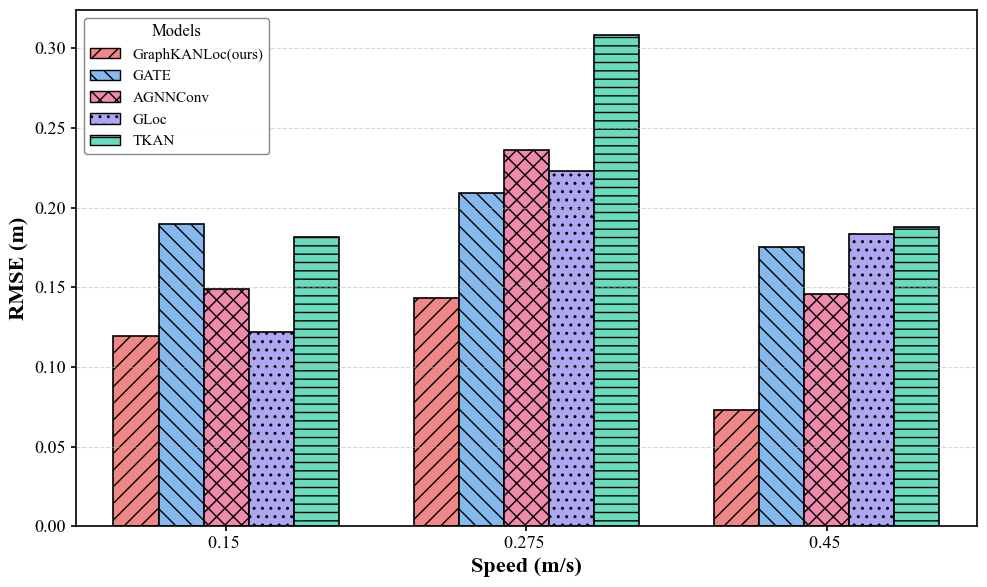


绘图完成！颜色已更新为鲜艳风格。


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.patches as mpatches
# ==========================================
# 1. 设置绘图风格 (Nature Style)
# ==========================================
plt.rcParams['font.family'] = 'Times new Roman'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['legend.frameon'] = False

# ==========================================
# 2. 数据文件配置
# ==========================================
# 映射关系: 文件名 -> (模型显示名称, 速度标签)
# 请确保这些 CSV 文件在您的当前目录下
files_config = {
    # GraphKANLoc (Ours)
    "Gkan_0.15_Speed_OB.csv":        ("GraphKANLoc(ours)", "0.15 "),
    "Gkan_0.275_Speed_OB.csv": ("GraphKANLoc(ours)", "0.275 "),
    "Gkan_0.45_Speed_withoutOB.csv": ("GraphKANLoc(ours)", "0.45 "),
    
    # Tkan
    "tkan_0.15_Speed_OB.csv":        ("TKAN", "0.15 "),
    "tkan_0.275_Speed_OB.csv": ("TKAN", "0.275 "),
    "tkan_OWP.csv": ("TKAN", "0.45 "),
    # GATE
    "GATE_0.15_Speed_OB.csv":        ("GATE", "0.15 "),
    "GATE_0.275_Speed_OB.csv":("GATE", "0.275 "),
    "GATE_0.45_Speed_withoutOB.csv": ("GATE", "0.45 "),
    # GLoc
    "GLoc_Final_0.15_Speed_OB.csv":  ("GLoc", "0.15 "),
    "Gloc_0.275_Speed_OB.csv": ("GLoc", "0.275 "),
    "GLoc_0.45_Speed_withoutOB.csv": ("GLoc", "0.45 "),
    # Zigbee (AGNNConv)
    "Zigbee_0.15_Speed_OB.csv": ("AGNNConv", "0.15 "),
    "Zigbee_0.275_Speed_OB.csv":("AGNNConv", "0.275 "),
    "Zigbee_0.45_Speed_withoutOB.csv":  ("AGNNConv", "0.45 "),
}

data_list = []

print("正在处理数据文件...")

for fname, (model_name, speed_label) in files_config.items():
    if os.path.exists(fname):
        try:
            df = pd.read_csv(fname)
            
            # --- 自动检测预测列名 ---
            # 您的部分文件列名可能是 'Pred_Raw_X' 或 'Pred_KF_X'
            pred_x_col = 'Pred_X'
            pred_y_col = 'Pred_Y'
            
            if pred_x_col not in df.columns:
                if 'Pred_Raw_X' in df.columns:
                    pred_x_col = 'Pred_Raw_X'
                    pred_y_col = 'Pred_Raw_Y'
                elif 'Pred_KF_X' in df.columns:
                    pred_x_col = 'Pred_KF_X'
                    pred_y_col = 'Pred_KF_Y'
            
            # --- 计算 RMSE ---
            if pred_x_col in df.columns and 'True_X' in df.columns:
                mse = ((df['True_X'] - df[pred_x_col])**2 + 
                       (df['True_Y'] - df[pred_y_col])**2).mean()
                rmse = np.sqrt(mse)
                
                data_list.append({
                    'Model': model_name,
                    'Speed': speed_label,
                    'RMSE': rmse
                })
            else:
                print(f"Warning: Columns not found in {fname}")
                
        except Exception as e:
            print(f"Error reading {fname}: {e}")
    else:
        print(f"File not found: {fname}")

# 转为 DataFrame
df_results = pd.DataFrame(data_list)

# ==========================================
# 3. 绘制柱状图 (鲜艳配色 + 纹理版)
# ==========================================
if not df_results.empty:
    plt.figure(figsize=(10, 6))
    
    # 1. 【核心修改】鲜艳配色方案
    custom_palette = {
        "GraphKANLoc(ours)": "#FF7675", # 珊瑚粉 (清新红)
        "GATE":              "#74B9FF", # 天空蓝 (通透)
        "AGNNConv":          "#FD79A8", # 浅梅红 (或者选 #FAB1A0 蜜桃色)
        "GLoc":              "#A29BFE", # 长春花蓝 (紫罗兰色)
        "TKAN":              "#55EFC4"  # 薄荷绿 (非常清爽)
    }
    
    # 模型顺序
    model_order = ["GraphKANLoc(ours)", "GATE", "AGNNConv", "GLoc", "TKAN"]
    model_order = [m for m in model_order if m in df_results['Model'].unique()]

    # 2. 定义纹理样式 (保留您刚才的需求)
    hatch_patterns = ['//', '\\\\', 'xx', '..', '--'] 

    # 3. 绘图
    ax = sns.barplot(x='Speed', y='RMSE', hue='Model', data=df_results,
                     hue_order=model_order,
                     palette=custom_palette,
                     edgecolor='black', linewidth=1.2, 
                     width=0.75) # 稍微调宽一点柱子，让颜色更明显

    # 4. 给柱子添加纹理
    for i, container in enumerate(ax.containers):
        pattern = hatch_patterns[i % len(hatch_patterns)]
        for bar in container:
            bar.set_hatch(pattern)
            # 也可以在这里设置透明度，让颜色稍微通透一点，但这会降低鲜艳度
            # bar.set_alpha(0.9) 

    # ==========================================
    # 4. 细节美化
    # ==========================================
    plt.xlabel('Speed (m/s)', fontsize=16, fontweight='bold')
    plt.ylabel('RMSE (m)', fontsize=16, fontweight='bold')
    
    # 网格线稍微黑一点点，因为现在的颜色很亮，网格线太淡看不清
    plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)
    
    plt.tick_params(labelsize=13) # 刻度字号

    # 更新图例 (带颜色+纹理)
    handles, labels = ax.get_legend_handles_labels()
    new_handles = []
    for i, handle in enumerate(handles):
        h_color = handle.get_facecolor()
        h_pattern = hatch_patterns[i % len(hatch_patterns)]
        patch = mpatches.Patch(facecolor=h_color, 
                               edgecolor='black', 
                               hatch=h_pattern, 
                               label=labels[i])
        new_handles.append(patch)

# 【修改点在这里】
    plt.legend(handles=new_handles, 
               title='Models', 
               title_fontsize=12, 
               fontsize=11, 
               
               # 1. 位置设为左上角或右上角 (根据您的数据哪边空旷决定)
               #    'upper left'  : 左上角
               #    'upper right' : 右上角
               loc='upper left',  
               
               # 2. 开启边框和背景 (非常重要，防止看不清)
               frameon=True,         # 显示图例边框
               framealpha=0.95,      # 背景不透明度 (0-1)，设高一点遮住后面的网格
               facecolor='white',    # 背景色
               edgecolor='gray')     # 边框色
    
    plt.tight_layout()
    plt.savefig('RMSE_Comparison_Vibrant.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n绘图完成！颜色已更新为鲜艳风格。")
else:
    print("没有数据。")

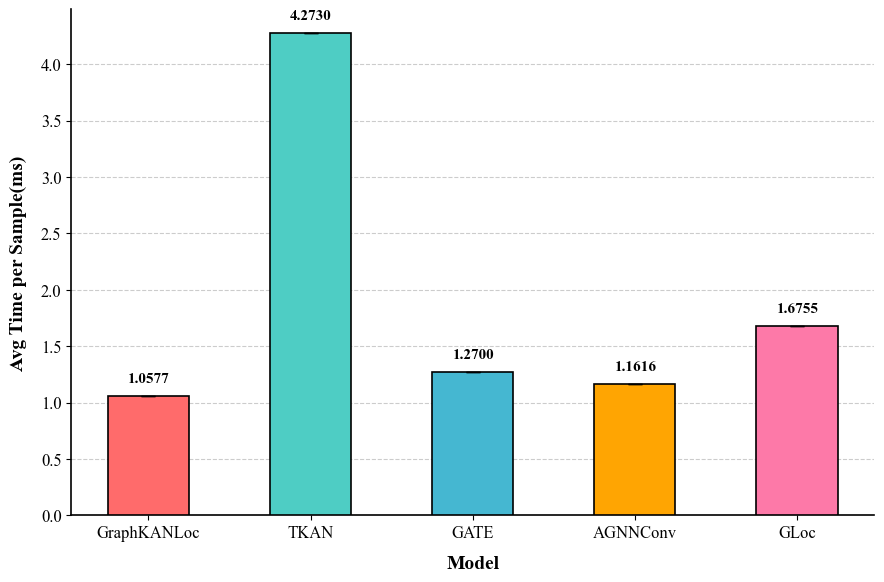

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# 1. 样式设置 (科研风格 + Times New Roman)
# ==========================================
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

# ==========================================
# 2. 数据输入 (请在此处修改为您的真实数据)
# ==========================================
# 模型名称
models = ['GraphKANLoc','TKAN', 'GATE', 'AGNNConv', 'GLoc']

# 对应的耗时 (单位通常是 ms 或 s，这里假设是毫秒)
# 请按顺序填入您的数据
times = [1.0577, 4.273, 1.27, 1.1616, 1.6755] 

# 可选：误差棒 (标准差)，如果没有可以设为全是 0
errors = [0, 0, 0, 0, 0] 

# ==========================================
# 3. 绘图配置
# ==========================================
plt.figure(figsize=(9, 6))

# 您指定的亮色系配色
my_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA502',"#FD79A8"]

# 绘制柱状图
# zorder=3 让柱子显示在网格线前面
bars = plt.bar(models, times, 
               yerr=errors,        # 添加误差棒
               color=my_palette,   # 使用指定颜色
               capsize=5,          # 误差棒两端横线宽度
               width=0.5,          # 柱子宽度
               edgecolor='black',  # 柱子边框颜色
               linewidth=1.2,      # 柱子边框粗细
               zorder=3) 

# ==========================================
# 4. 细节修饰
# ==========================================
plt.xlabel('Model', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Avg Time per Sample(ms)', fontsize=14, fontweight='bold', labelpad=10)
# plt.title('Average Inference Time per Sample', fontsize=16, pad=15)

# Y轴网格线 (灰色虚线，背景)
plt.grid(axis='y', linestyle='--', alpha=0.4, color='gray', zorder=0)

# 在柱子上方显示具体数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, 
             f'{height:.4f}', 
             ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

# 去掉上方和右侧的边框，让图表更清爽 (Tufte 风格)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Inference_Time_BarChart.png', dpi=300)
plt.show()